In [ ]:
'''
Q1
From these three csv files, create a single dataframe which will include following columns only

from the "crashes.csv", accident data (acc_dat), accident time (acc_time), weather description (weather_desc),
report no, county (county_desc), latittude, and longitude
from the "persons.csv", gender, data of birth, and state code
from the "vehicles.csv", vehicle year, vehicle make, speed limit
Save your dataframe as a new csv file called "md_crash_2020.csv".

Note: All these csv files have the 'REPORT_NO' column. You need to use that column to combine these datasets.

'''

import pandas as pd
#Reading .csv files
df_crashes = pd.read_csv('/Users/yash/Downloads/Data 601/Project1/Maryland_Statewide_Vehicle_Crashes.csv')
df_peoples = pd.read_csv('/Users/yash/Downloads/Data 601/Project1/Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv')
df_vehicles = pd.read_csv('/Users/yash/Downloads/Data 601/Project1/Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv')
#Creating Vehicles.csv file
vehicles = df_vehicles[df_vehicles.YEAR == 2020]
vehicles = vehicles[["REPORT_NO","VEH_YEAR", "VEH_MAKE", "SPEED_LIMIT"]]
vehicles.to_csv("vehicles.csv")
#creating Persons.csv file
persons = df_peoples[df_peoples.YEAR == 2020]
persons = persons[["REPORT_NO","SEX_DESC","DATE_OF_BIRTH","LICENSE_STATE_CODE"]]
persons.to_csv("persons.csv")
#creating Crashes.csv file
crashes = df_crashes[df_crashes.YEAR == 2020]
crashes = crashes[["REPORT_NO","ACC_DATE","ACC_TIME","WEATHER_DESC","COUNTY_DESC","LATITUDE","LONGITUDE"]]
crashes.to_csv("crashes.csv")
#merging three data sets to md_crash_2020.
md_crash = pd.merge(crashes, persons, 
                   on='REPORT_NO', 
                   how='inner')
md_crash_2020 = pd.merge(md_crash,vehicles, 
                   on='REPORT_NO', 
                   how='inner')
md_crash_2020.to_csv("md_crash_2020.csv")
print("The Csv files for persons, vehicles, crashes and md_crash_2020 are done.")


In [ ]:
# QUESTION 2:
#A.For each county, determine the average age of the drivers who were involved in these accidents
md_crash_2020['DATE_OF_BIRTH'] = md_crash_2020['DATE_OF_BIRTH'].map(str)
md_crash_2020['DATE_OF_BIRTH'] = md_crash_2020['DATE_OF_BIRTH'].apply(lambda x: x[:8])
md_crash_2020['DATE_OF_BIRTH'] = pd.to_datetime(md_crash_2020['DATE_OF_BIRTH'])

md_crash_2020['ACC_DATE'] = md_crash_2020['ACC_DATE'].map(str)
md_crash_2020['ACC_DATE'] = pd.to_datetime(md_crash_2020['ACC_DATE'])

md_crash_2020['age'] = (md_crash_2020['ACC_DATE'] - md_crash_2020['DATE_OF_BIRTH']).astype('<m8[Y]')
md_crash_2020.to_csv("md_crash_2020.csv")

md_crash_2020.groupby('COUNTY_DESC', as_index=False)['age'].mean()

#B. Then list the sorted averages (from youngest to oldest)
md_crash_2020.groupby('COUNTY_DESC', as_index=False)['age'].mean().sort_values(by='age', ascending=True)


,COUNTY_DESC,age
23,Worcester,34.228873
3,Baltimore City,36.127458
8,Charles,36.150737
19,St. Mary's,36.376847
22,Wicomico,36.430564
16,Prince George's,36.443625
11,Garrett,36.792841
7,Cecil,37.005231
5,Caroline,37.146429
13,Howard,37.199817


In [ ]:
#Question 3:
# A. Determine the total number of crashes per "vehicle make". List the sorted values (e.g. Honda, 1234)
print(md_crash_2020["VEH_MAKE"].value_counts(dropna = False, ascending=True))

# B. Determine average age of the car involved in these accidents for each "vehicle make".
md_crash_2020['VEH_YEAR'] = md_crash_2020['VEH_YEAR'].map(str)
md_crash_2020['VEH_YEAR'] = md_crash_2020['VEH_YEAR'].apply(lambda x: x[:4])
md_crash_2020['VEH_YEAR'] = pd.to_datetime(md_crash_2020['VEH_YEAR'], format = "%Y",errors='coerce')
md_crash_2020['CAR_AGE'] = md_crash_2020['ACC_DATE'].dt.year - md_crash_2020['VEH_YEAR'].dt.year
md_crash_2020.groupby(["VEH_MAKE"])["CAR_AGE"].mean()

EZ LOAD             1
MERCS-BENZ          1
HRLY DVDSN          1
NISSAB              1
RANGE ROVERE        1
                ...  
UNKNOWN         18929
NISSAN          28016
TOYOTA          39668
HONDA           41282
FORD            48525
Name: VEH_MAKE, Length: 2434, dtype: int64


VEH_MAKE
00                      20.0
000                      NaN
0000                     0.0
00000                    NaN
0099                     NaN
                        ... 
YY 150 TS               14.0
ZERO                     0.0
ZHEJIANG                 1.0
ZHEJIANG TAOTAO VEH.     NaN
`BUIC                   19.0
Name: CAR_AGE, Length: 2433, dtype: float64

In [ ]:
#Q4(GET CIRCLE PLOT FOR QUES-A)
# A. Determine all the accidents that happened in a circle centered at (39.016149, -77.117942) with a radius of 5 km. Among them,
from math import radians, sin, cos, acos
import numpy as np
slat = radians(39.49273)
slon = radians(-77.33237)
list1 =[]
speed_great_51 = 0
speed_less_41 = 0
i =0
for a,b in zip(md_crash_2020.LATITUDE, md_crash_2020.LONGITUDE):
    i+=1
    elat = radians(a)
    elon = radians(b)
    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    list1.append(dist)
    if dist <=5:
#         print(md_crash_2020.loc[i])
        if md_crash_2020.SPEED_LIMIT[i] >51:
            speed_great_51+=1
            
        elif  md_crash_2020.SPEED_LIMIT[i] <41:
            speed_less_41+=1
        
        
    else:
        pass
md_crash_2020["DISTANCE"] = list1
dist_less_5 = md_crash_2020[md_crash_2020["DISTANCE"] < 5]
print(dist_less_5.head())
# b. Determine the number of accidents where the speed limit was above 51 miles per hour.
print(f"\nThe number of accidents where the speed limit was above 51 miles per hour is: ", speed_great_51)
# c. Determine the number of accidents where the speed limit was below 41 miles per hour.
print(f"The number of accidents where the speed limit was above 51 miles per hour is: ", speed_less_41)

         REPORT_NO   ACC_DATE  ACC_TIME    WEATHER_DESC COUNTY_DESC  \
8374    ZJ05250021 2020-05-24  00:37:00             NaN   Frederick   
25294  MSP65800073 2020-06-11  13:15:00  Not Applicable   Frederick   
25295  MSP65800073 2020-06-11  13:15:00  Not Applicable   Frederick   
25296  MSP65800073 2020-06-11  13:15:00  Not Applicable   Frederick   
25297  MSP65800073 2020-06-11  13:15:00  Not Applicable   Frederick   

        LATITUDE  LONGITUDE SEX_DESC DATE_OF_BIRTH LICENSE_STATE_CODE  \
8374   39.506186 -77.374413     Male    1996-06-14                 MD   
25294  39.464619 -77.365696     Male    1999-11-24                 MD   
25295  39.464619 -77.365696     Male    1999-11-24                 MD   
25296  39.464619 -77.365696   Female    1950-08-01                 MD   
25297  39.464619 -77.365696   Female    1950-08-01                 MD   

        VEH_YEAR VEH_MAKE  SPEED_LIMIT   age  CAR_AGE  DISTANCE  
8374  2007-01-01   TOYOTA           40  23.0     13.0  3.905359  
25

In [ ]:
#Q.5
'''a. Determine the number of drivers, who got in a car crash, from non-DMV states 
as a function of gender and list them
St Male Female
NY 1510  622
PA 1251 1312
...
Note: DMV states: DC, MD, and VA'''
gender_crash = md_crash_2020[["SEX_DESC", "LICENSE_STATE_CODE"]]
gender_crash = gender_crash[(gender_crash.LICENSE_STATE_CODE != "DC")  & (gender_crash.LICENSE_STATE_CODE != "MD") & (gender_crash.LICENSE_STATE_CODE != "VA")]
print(gender_crash.info())
gender_crash_1 = gender_crash.groupby(["LICENSE_STATE_CODE"])["SEX_DESC"].value_counts().unstack().fillna(0)
print(gender_crash_1)


'''b. Normalize the previous list with number of male drivers and female drivers for each state. 
e.g. There are 1 million male drivers in NY and 2 million female drivers, then the normalized numbers should be

St    Male_Norm  Female_Norm
NY    1.510e-3  0.311e-3'''


gender_crash_scaled = gender_crash_1.copy()
for column in gender_crash_scaled.columns:
    gender_crash_scaled[column] = gender_crash_scaled[column] / gender_crash_scaled[column].abs().max()
display(gender_crash_scaled)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 156285 entries, 0 to 411733
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   SEX_DESC            119598 non-null  object
 1   LICENSE_STATE_CODE  26279 non-null   object
dtypes: object(2)
memory usage: 3.6+ MB
None
SEX_DESC            Female    Male  Unknown
LICENSE_STATE_CODE                         
AB                     2.0     0.0      0.0
AK                    19.0    29.0      1.0
AL                    41.0    67.0      0.0
AR                    23.0    37.0      0.0
AS                     0.0     2.0      0.0
...                    ...     ...      ...
WI                    22.0    50.0      0.0
WV                   586.0   999.0      3.0
WY                     5.0    15.0      0.0
XX                   619.0  2105.0    254.0
YT                     0.0     4.0      0.0

[67 rows x 3 columns]


SEX_DESC,Female,Male,Unknown
LICENSE_STATE_CODE,,,
AB,0.000944,0.000000,0.000000
AK,0.008971,0.006369,0.003937
AL,0.019358,0.014716,0.000000
AR,0.010859,0.008127,0.000000
AS,0.000000,0.000439,0.000000
...,...,...,...
WI,0.010387,0.010982,0.000000
WV,0.276676,0.219416,0.011811
WY,0.002361,0.003295,0.000000


In [ ]:
#Q6
#a. On which day of the week (Monday through Sunday) do the most of the crashes happen?
md_crash_2020["ACC_DAY"] = md_crash_2020["ACC_DATE"].dt.day_name()
print(f"The most crashes happened on the friday: ",md_crash_2020.groupby(["ACC_DAY"])["ACC_DAY"].count().max())

#b. On which hour of the day (00 - 24) do the most of the crashes happen?
md_crash_2020['ACC_TIME'] = pd.to_datetime(md_crash_2020['ACC_TIME'])
md_crash_2020["ACC_HOUR"] = md_crash_2020['ACC_TIME'].apply(lambda x: x.hour)
print(f"The most accidents happened at 1700 hours: ",md_crash_2020.groupby(["ACC_HOUR"])["ACC_HOUR"].count().max())


The most crashes happened on the friday:  69915
The most accidents happened at 1700 hours:  34859


In [ ]:
#Q.7
'''You need assume that it is a rainy/snowy day if the second column is bigger than 0.05 
or if the third column is bigger than 1; otherwise take that day as a non-rainy/snowy day.'''

#a. What is the ratio of the number of accidents happened in rainy/snowy days to the number of
#accidents happened in non-rainy/snowy days?

url = "https://raw.githubusercontent.com/simsekergun/DATA601/main/Project1/MD2020_Rain_Snow.csv"
climate=pd.read_csv(url, encoding='utf8', on_bad_lines='skip')
climate["Date"] = pd.to_datetime(climate["Date"], format='%m/%d/%Y',exact=False)
climate.rename(columns = {'Date':'ACC_DATE'}, inplace = True)
output = pd.merge(md_crash_2020,climate, on=['ACC_DATE'], how='outer')
output1 = output.copy()
output1.rename(columns = {'Precip in.':'Precip', 'Snow in.':'Snow' }, inplace = True)
rainy_days = output1[(output1.Precip > 0.05) | (output1.Snow > 1)].count()
nonrainy_days = output1[(output1.Precip <= 0.05)& (output1.Snow < 1)].count()
print(f"\nThe number of accidents happened on rainy day are: ", rainy_days["Precip"])
print(f"\nThe number of accidents happened on non-rainy day are: ", nonrainy_days["Precip"])      
print(f"\nThe ratio between rainy days and non-rainy days is: ", nonrainy_days["Precip"]/rainy_days["Precip"])


#B b. What does this ratio tell us?
print("\nThe ratio tells us that for one accident on rainy day approximately 54 accidents are happening on non-rainy days")



The number of accidents happened on rainy day are:  153790

The number of accidents happened on non-rainy day are:  255642

The ratio between rainy days and non-rainy days is:  1.6622797321022174

The ratio tells us that for one accident on rainy day approximately 54 accidents are happening on non-rainy days


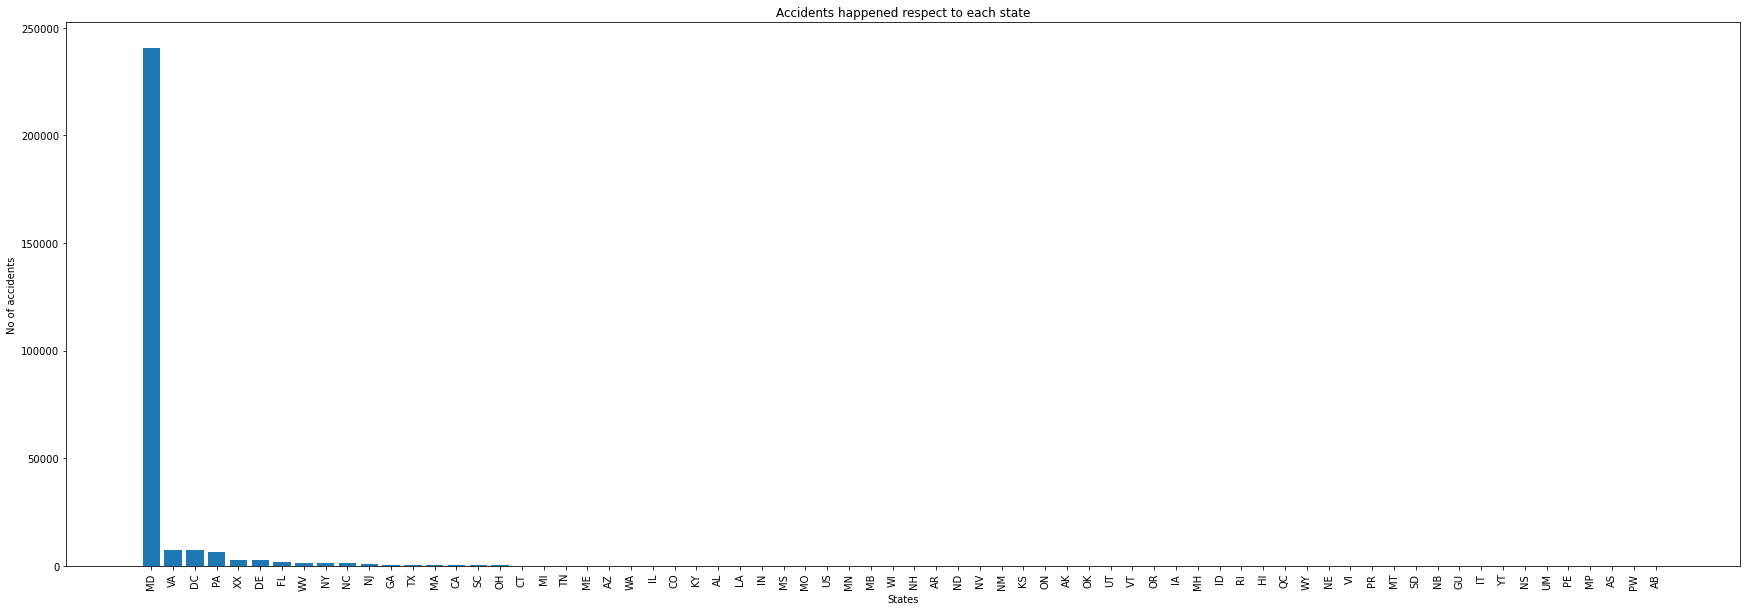

In [ ]:
#Q.8Use matplotlib and/or seaborn and show your talent in data visualization. 
#You are free to visualize anything you want regarding this dataset.
import matplotlib.pyplot as plt

#8A. Accidents happened in each state.
crash_states = md_crash_2020['LICENSE_STATE_CODE'].value_counts()
crash_states = pd.DataFrame({'state':crash_states.index, 'count':crash_states.values})
#print(crash_states)
plt.figure(figsize=(30,10))
plt.bar(crash_states["state"],crash_states["count"])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("No of accidents")
plt.title("Accidents happened respect to each state")
plt.show()

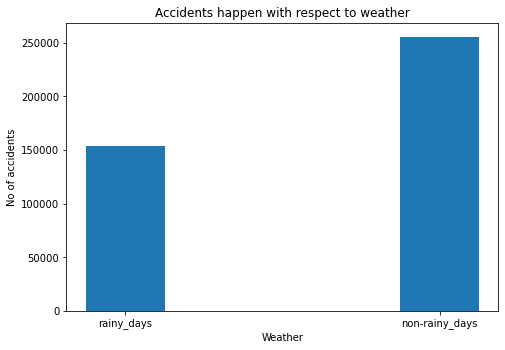

In [ ]:
#Accidents happened in rainy and non-rainy days
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = [rainy_days["Precip"], nonrainy_days["Precip"]]
x = ["rainy_days", "non-rainy_days"]
ax.bar(x,y,width = 0.25)
plt.xlabel("Weather")
plt.ylabel("No of accidents")
plt.title("Accidents happen with respect to weather")
plt.show()

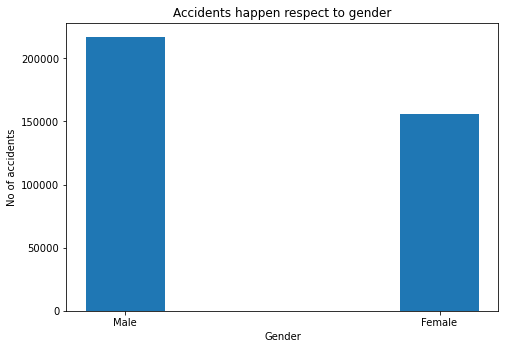

In [ ]:
#graph between male and female drivers:
gender_graph = md_crash_2020["SEX_DESC"].value_counts()
# print(gender_graph)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = [gender_graph["Male"], gender_graph["Female"]]
x = ["Male", "Female"]
ax.bar(x,y,width = 0.25)
plt.xlabel("Gender")
plt.ylabel("No of accidents")
plt.title("Accidents happen respect to gender")
plt.show()

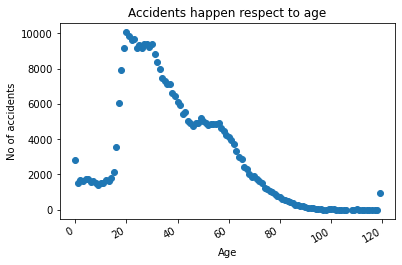

In [ ]:
#graph between ages of accidents
age_graph = md_crash_2020["age"].value_counts()
age_graph = pd.DataFrame({'age':age_graph.index, 'count':age_graph.values})
x = age_graph["age"]
y = age_graph["count"]
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("No of accidents")
plt.title("Accidents happen respect to age")
plt.gcf().autofmt_xdate()
plt.show()


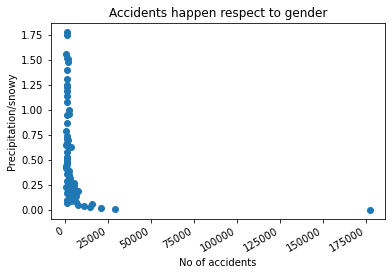

In [ ]:
#scatter plot for precip accidents.
climate_acc = output1["Precip"].value_counts()
climate_acc = pd.DataFrame({'precip':climate_acc.index, 'count':climate_acc.values})
x = [climate_acc["count"]]
y = [climate_acc["precip"]]
plt.scatter(x,y)
plt.xlabel("No of accidents")
plt.ylabel("Precipitation/snowy")
plt.title("Accidents happen respect to gender")
plt.gcf().autofmt_xdate()
plt.show()

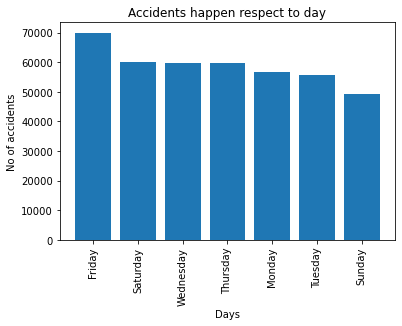

In [ ]:
#No. of accidents happened at days.
acc_day = md_crash_2020["ACC_DATE"].dt.day_name().value_counts()
acc_day = pd.DataFrame({'day':acc_day.index, 'count':acc_day.values})
# print(acc_day)
plt.bar(acc_day["day"], acc_day["count"])
plt.xlabel("Days")
plt.ylabel("No of accidents")
plt.title("Accidents happen respect to day")
plt.xticks(rotation=90)
plt.show()

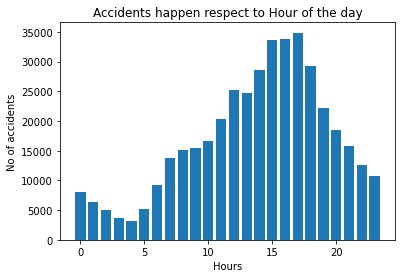

In [ ]:
#No. of accidents happened at hour.
acc_hour = md_crash_2020["ACC_HOUR"].value_counts()
acc_hour = pd.DataFrame({'hour':acc_hour.index, 'count':acc_hour.values})
plt.bar(acc_hour["hour"], acc_hour["count"])
plt.xlabel("Hours")
plt.ylabel("No of accidents")
plt.title("Accidents happen respect to Hour of the day")
plt.show()

In [ ]:
md_crash_2020.to_csv("md_crash_2020.csv")
md_crash_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411734 entries, 0 to 411733
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   REPORT_NO           411734 non-null  object        
 1   ACC_DATE            411734 non-null  datetime64[ns]
 2   ACC_TIME            411734 non-null  datetime64[ns]
 3   WEATHER_DESC        99162 non-null   object        
 4   COUNTY_DESC         411732 non-null  object        
 5   LATITUDE            411734 non-null  float64       
 6   LONGITUDE           411734 non-null  float64       
 7   SEX_DESC            375047 non-null  object        
 8   DATE_OF_BIRTH       374341 non-null  datetime64[ns]
 9   LICENSE_STATE_CODE  281728 non-null  object        
 10  VEH_YEAR            391634 non-null  datetime64[ns]
 11  VEH_MAKE            411712 non-null  object        
 12  SPEED_LIMIT         411734 non-null  int64         
 13  age                 374341 no